# Query Sentinel-2 images

In this notebook we will show how to query Sentinel-2 images over an area between two given dates. We will use the `sentinelsat` package to obtain the Sentinel-2 product names and we will read those from the [public GCP bucket](https://cloud.google.com/storage/docs/public-datasets/sentinel-2) (`gs://gcp-public-data-sentinel-2/tiles`).

Set the env variables to be able to read from the Google bucket. This  will incur in reading costs.

## Install package with Google dependecies 

This is needed to read image from S2 bucket and to query to Copernicus SciHub
```
pip install georeader-spaceml fsspec gcsfs sentinelsat
```

In [1]:
import os
import datetime
from shapely.geometry import box
import geopandas as gpd
from georeader.readers import S2_SAFE_reader

# Donwload key from next line link to access the buckets and requester pays requests to public bucket (this is needed to query Sentinel-2 data)
# This is required to do advaced operations in the GCP bucket
# os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "path/to/file.json"
# os.environ["GS_USER_PROJECT"] = "project-name"
# S2_SAFE_reader.DEFAULT_REQUESTER_PAYS=True

os.environ["GS_NO_SIGN_REQUEST"] = "YES"

Create a geojson file using [geojson.io](https://geojson.io/)

In [2]:
import geopandas as gpd

# aoi = gpd.read_file("/home/gonzalo/Downloads/sagunt_small.geojson")
aoi = gpd.read_file("/home/gonzalo/Downloads/liria.geojson")
# aoi.explore()

### Step 1: Select dates and area of interest to read

In [3]:
from zoneinfo import ZoneInfo

tz = ZoneInfo("Europe/Madrid")

polygon_read = aoi.unary_union
crs_polygon = aoi.crs

datetime_str = "2019-09-28"
date_of_interest = datetime.datetime.strptime(datetime_str, "%Y-%m-%d").replace(tzinfo=tz)

date_start_search = date_of_interest - datetime.timedelta(days=10)
date_end_search = date_of_interest + datetime.timedelta(days=6)

print(f"Querying images between {date_start_search} and {date_end_search}\nArea: {polygon_read}")

Querying images between 2019-09-18 00:00:00+02:00 and 2019-10-04 00:00:00+02:00
Area: POLYGON ((-0.74432373046875 39.52099229357195, -0.383148193359375 39.52099229357195, -0.383148193359375 39.81486542536203, -0.74432373046875 39.81486542536203, -0.74432373046875 39.52099229357195))


### Step 2: Query the products

In [5]:
from georeader.readers import scihubcopernicus_query

# from sentinelsat.sentinel import SentinelAPI
# # 'https://scihub.copernicus.eu/apihub'
# api = SentinelAPI('gonzmg88', "yyyyyyy", api_url='https://scihub.copernicus.eu/dhus/')

products_gpd = scihubcopernicus_query.query(polygon_read, date_start_search, date_end_search)
products_gpd[["overlappercentage","cloudcoverpercentage", "utcdatetime","localdatetime","solardatetime","solarday"]]

overlappercentage  \
title                                                                   
S2B_MSIL1C_20190918T105029_N0208_R051_T30SYJ_20...          54.697721   
S2B_MSIL1C_20190918T105029_N0208_R051_T30TYK_20...          48.189182   
S2B_MSIL1C_20190918T105029_N0208_R051_T30SXJ_20...          36.440780   
S2B_MSIL1C_20190918T105029_N0208_R051_T30TXK_20...          32.170540   
S2B_MSIL1C_20190928T105029_N0208_R051_T30SYJ_20...          54.697682   
S2B_MSIL1C_20190928T105029_N0208_R051_T30TYK_20...          48.189182   
S2B_MSIL1C_20190928T105029_N0208_R051_T30SXJ_20...          36.440780   
S2B_MSIL1C_20190928T105029_N0208_R051_T30TXK_20...          32.170522   
S2A_MSIL1C_20191003T105031_N0208_R051_T30SYJ_20...          54.697682   
S2A_MSIL1C_20191003T105031_N0208_R051_T30TYK_20...          48.189182   
S2A_MSIL1C_20191003T105031_N0208_R051_T30SXJ_20...          36.440780   

                                                    cloudcoverpercentage  \
title                                                                      
S2B_MSIL1C_20190918T105029_N0208_R051_T30SYJ_20...                0.7080   
S2B_MSIL1C_20190918T105029_N0208_R051_T30TYK_20...                5.3711   
S2B_MSIL1C_20190918T105029_N0208_R051_T30SXJ_20...                0.2546   
S2B_MSIL1C_20190918T105029_N0208_R051_T30TXK_20...               25.4126   
S2B_MSIL1C_20190928T105029_N0208_R051_T30SYJ_20...               10.2055   
S2B_MSIL1C_20190928T105029_N0208_R051_T30TYK_20...               12.7102   
S2B_MSIL1C_20190928T105029_N0208_R051_T30SXJ_20...               12.5037   
S2B_MSIL1C_20190928T105029_N0208_R051_T30TXK_20...                3.4074   
S2A_MSIL1C_20191003T105031_N0208_R051_T30SYJ_20...               46.1493   
S2A_MSIL1C_20191003T105031_N0208_R051_T30TYK_20...               43.6094   
S2A_MSIL1C_20191003T105031_N0208_R051_T30SXJ_20...               35.3732   

                                                                        utcdatetime  \
title                                                                                 
S2B_MSIL1C_20190918T105029_N0208_R051_T30SYJ_20... 2019-09-18 10:50:29.024000+00:00   
S2B_MSIL1C_20190918T105029_N0208_R051_T30TYK_20... 2019-09-18 10:50:29.024000+00:00   
S2B_MSIL1C_20190918T105029_N0208_R051_T30SXJ_20... 2019-09-18 10:50:29.024000+00:00   
S2B_MSIL1C_20190918T105029_N0208_R051_T30TXK_20... 2019-09-18 10:50:29.024000+00:00   
S2B_MSIL1C_20190928T105029_N0208_R051_T30SYJ_20... 2019-09-28 10:50:29.024000+00:00   
S2B_MSIL1C_20190928T105029_N0208_R051_T30TYK_20... 2019-09-28 10:50:29.024000+00:00   
S2B_MSIL1C_20190928T105029_N0208_R051_T30SXJ_20... 2019-09-28 10:50:29.024000+00:00   
S2B_MSIL1C_20190928T105029_N0208_R051_T30TXK_20... 2019-09-28 10:50:29.024000+00:00   
S2A_MSIL1C_20191003T105031_N0208_R051_T30SYJ_20... 2019-10-03 10:50:31.024000+00:00   
S2A_MSIL1C_20191003T105031_N0208_R051_T30TYK_20... 2019-10-03 10:50:31.024000+00:00   
S2A_MSIL1C_20191003T105031_N0208_R051_T30SXJ_20... 2019-10-03 10:50:31.024000+00:00   

                                                                      localdatetime  \
title                                                                                 
S2B_MSIL1C_20190918T105029_N0208_R051_T30SYJ_20... 2019-09-18 12:50:29.024000+02:00   
S2B_MSIL1C_20190918T105029_N0208_R051_T30TYK_20... 2019-09-18 12:50:29.024000+02:00   
S2B_MSIL1C_20190918T105029_N0208_R051_T30SXJ_20... 2019-09-18 12:50:29.024000+02:00   
S2B_MSIL1C_20190918T105029_N0208_R051_T30TXK_20... 2019-09-18 12:50:29.024000+02:00   
S2B_MSIL1C_20190928T105029_N0208_R051_T30SYJ_20... 2019-09-28 12:50:29.024000+02:00   
S2B_MSIL1C_20190928T105029_N0208_R051_T30TYK_20... 2019-09-28 12:50:29.024000+02:00   
S2B_MSIL1C_20190928T105029_N0208_R051_T30SXJ_20... 2019-09-28 12:50:29.024000+02:00   
S2B_MSIL1C_20190928T105029_N0208_R051_T30TXK_20... 2019-09-28 12:50:29.024000+02:00   
S2A_MSIL1C_20191003T105031_N0208_R051_T30SYJ_20... 2019-10-03 12:50:31.024000+02:00   
S2A_MSIL1C_20191003T1050

## Show products queried

In [7]:
import folium

products_gpd["localdatetime_str"] = products_gpd["localdatetime"].dt.strftime("%Y-%m-%d %H:%M:%S")
m = products_gpd[["geometry","overlappercentage","cloudcoverpercentage", "localdatetime_str","solarday"]].explore("solarday",name="S2")
aoi.explore(m=m,name="AoI",color="red")
folium.LayerControl(collapsed=False).add_to(m)
m

### Step 3: Read  & plot the data

Here we will loop over the solar days querying and mosaicking the images over the AoI.


Selected 4 products for solar day 2019-09-18
Window(col_off=0, row_off=0, width=3187, height=3347) | 10.00, 0.00, 693070.00|
| 0.00,-10.00, 4410490.00|
| 0.00, 0.00, 1.00|
Window(col_off=0, row_off=0, width=3187, height=3347) | 10.00, 0.00, 693070.00|
| 0.00,-10.00, 4410490.00|
| 0.00, 0.00, 1.00|
Window(col_off=0, row_off=0, width=3187, height=3347) | 10.00, 0.00, 693070.00|
| 0.00,-10.00, 4410490.00|
| 0.00, 0.00, 1.00|
Window(col_off=0, row_off=0, width=3187, height=3347) | 10.00, 0.00, 693070.00|
| 0.00,-10.00, 4410490.00|
| 0.00, 0.00, 1.00|
 
         Transform: | 10.00, 0.00, 693070.00|
| 0.00,-10.00, 4410490.00|
| 0.00, 0.00, 1.00|
         Shape: (3, 3347, 3187)
         Resolution: (10.0, 10.0)
         Bounds: (693070.0, 4377020.0, 724940.0, 4410490.0)
         CRS: EPSG:32630
         fill_value_default: 0
         <class 'georeader.geotensor.GeoTensor'>


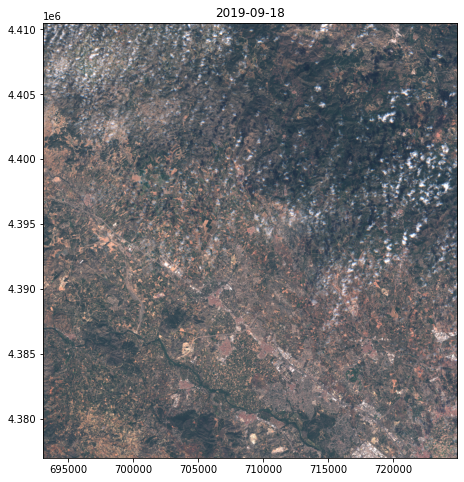

Selected 4 products for solar day 2019-09-28
Window(col_off=0, row_off=0, width=3187, height=3347) | 10.00, 0.00, 693070.00|
| 0.00,-10.00, 4410490.00|
| 0.00, 0.00, 1.00|
Window(col_off=0, row_off=0, width=3187, height=3347) | 10.00, 0.00, 693070.00|
| 0.00,-10.00, 4410490.00|
| 0.00, 0.00, 1.00|
Window(col_off=0, row_off=0, width=3187, height=3347) | 10.00, 0.00, 693070.00|
| 0.00,-10.00, 4410490.00|
| 0.00, 0.00, 1.00|
Window(col_off=0, row_off=0, width=3187, height=3347) | 10.00, 0.00, 693070.00|
| 0.00,-10.00, 4410490.00|
| 0.00, 0.00, 1.00|
 
         Transform: | 10.00, 0.00, 693070.00|
| 0.00,-10.00, 4410490.00|
| 0.00, 0.00, 1.00|
         Shape: (3, 3347, 3187)
         Resolution: (10.0, 10.0)
         Bounds: (693070.0, 4377020.0, 724940.0, 4410490.0)
         CRS: EPSG:32630
         fill_value_default: 0
         <class 'georeader.geotensor.GeoTensor'>


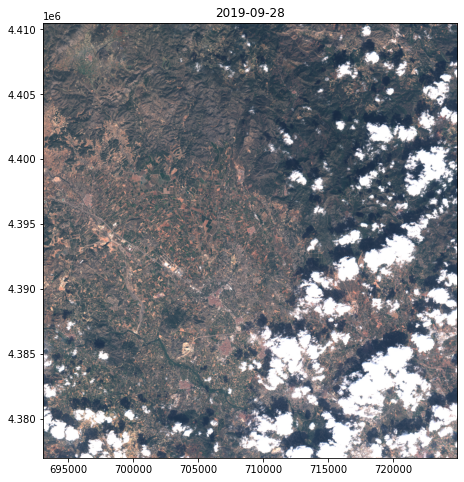

Selected 3 products for solar day 2019-10-03
Window(col_off=0, row_off=0, width=3187, height=3347) | 10.00, 0.00, 693070.00|
| 0.00,-10.00, 4410490.00|
| 0.00, 0.00, 1.00|
Window(col_off=0, row_off=0, width=3187, height=3347) | 10.00, 0.00, 693070.00|
| 0.00,-10.00, 4410490.00|
| 0.00, 0.00, 1.00|
Window(col_off=0, row_off=0, width=3187, height=3347) | 10.00, 0.00, 693070.00|
| 0.00,-10.00, 4410490.00|
| 0.00, 0.00, 1.00|
 
         Transform: | 10.00, 0.00, 693070.00|
| 0.00,-10.00, 4410490.00|
| 0.00, 0.00, 1.00|
         Shape: (3, 3347, 3187)
         Resolution: (10.0, 10.0)
         Bounds: (693070.0, 4377020.0, 724940.0, 4410490.0)
         CRS: EPSG:32630
         fill_value_default: 0
         <class 'georeader.geotensor.GeoTensor'>


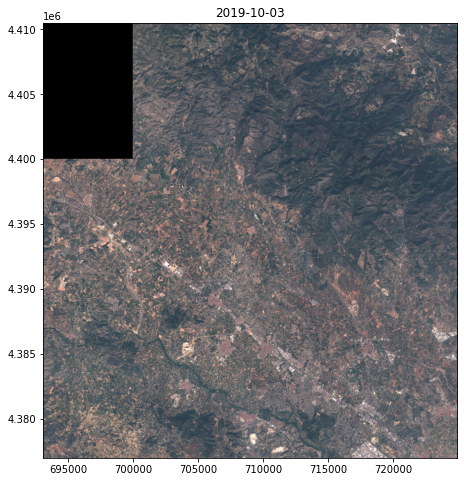

CPU times: user 2min 39s, sys: 27.3 s, total: 3min 7s
Wall time: 7min 35s


In [9]:
%%time
import numpy as np
from georeader import read
from georeader import mosaic
from georeader import window_utils
import rasterio.plot as rstplt
import matplotlib.pyplot as plt

for day, products_gpd_day in products_gpd.groupby("solarday"):    
    products_read = products_gpd_day.index
    print(f"Selected {products_read.shape[0]} products for solar day {day}")
    s2objs = []
    for product in products_read:
        s2_safe_folder = S2_SAFE_reader.s2_public_bucket_path(product+".SAFE", check_exists=False)
        s2objs.append(S2_SAFE_reader.s2loader(s2_safe_folder, out_res=10, bands=["B04", "B03", "B02"]))
    
    polygon_read_dst_crs = window_utils.polygon_to_crs(polygon_read, crs_polygon=crs_polygon, dst_crs=s2objs[0].crs)
    data_memory = mosaic.spatial_mosaic(s2objs, polygon=polygon_read_dst_crs, dst_crs= s2objs[0].crs)
    print(repr(data_memory))
    
    fig, ax = plt.subplots(1,1,figsize=(8,8))
    rstplt.show(np.clip((data_memory.values)/3_000,0,1), transform=data_memory.transform, ax=ax)
    ax.set_title(day)
    plt.show(fig)
    plt.close(fig)

In the last day there's a missing image (for that reason we have a black square in the top left corner). We inspect the available products in the cell bellow.

In [10]:
import geopandas as gpd

pol_mosaic = data_memory.footprint(crs=crs_polygon)

print(f"Overlap {pol_mosaic.intersection(polygon_read).area / polygon_read.area*100:.2f}%")

footprint_downloaded = gpd.GeoDataFrame({"geometry": [pol_mosaic], 
                                         "title": ["footprint mosaic"], 
                                         "group": ["footprint mosaic"]},
                                        crs=crs_polygon)

m = footprint_downloaded.explore(name="footprint",color="green")
m = aoi.explore(m=m,name="AoI",color="red")

Overlap 100.00%


## Licence
The georeader package is published under a [GNU Lesser GPL v3 licence](https://www.gnu.org/licenses/lgpl-3.0.en.html)

 If you find this work useful please cite:

```
@article{portales-julia_global_2023,
	title = {Global flood extent segmentation in optical satellite images},
	volume = {13},
	issn = {2045-2322},
	doi = {10.1038/s41598-023-47595-7},
	number = {1},
	urldate = {2023-11-30},
	journal = {Scientific Reports},
	author = {Portalés-Julià, Enrique and Mateo-García, Gonzalo and Purcell, Cormac and Gómez-Chova, Luis},
	month = nov,
	year = {2023},
	pages = {20316},
}
```